In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

In [35]:
excel_data = pd.ExcelFile(r'C:\Users\Shahed\OneDrive - Hashemite University\data_analysis-1\Data Model - Pizza Sales.xlsx')
data = excel_data.parse('pizza_sales')

In [36]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S').dt.hour

In [37]:
order_date_by_month=pd.to_datetime(data['order_date']).dt.month

In [38]:
sales_by_hour = data.groupby('order_time')['total_price'].sum()

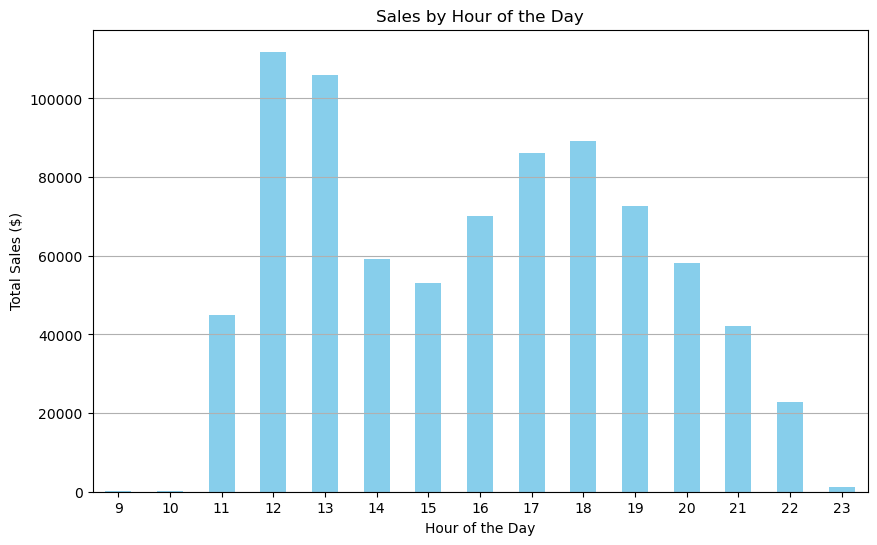

In [39]:
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar', color='skyblue')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [40]:
tsales_month=data.groupby(order_date_by_month)['total_price'].sum()

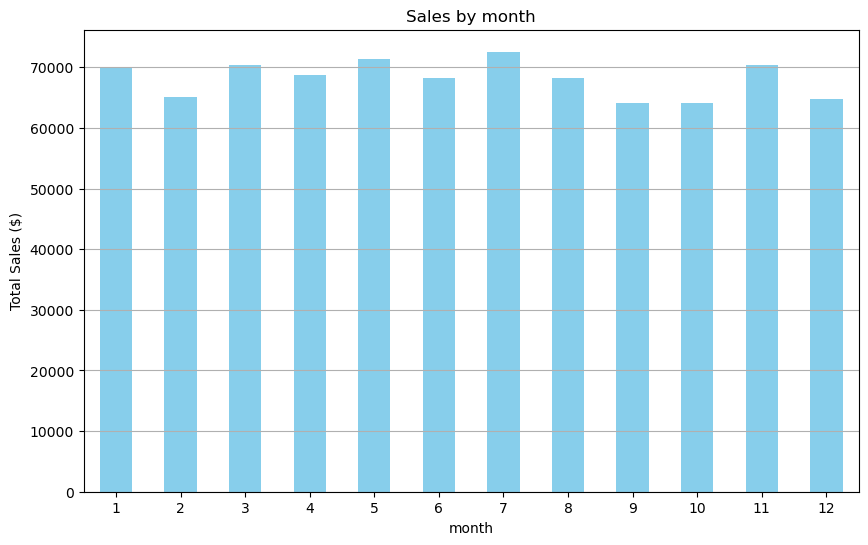

In [41]:
plt.figure(figsize=(10, 6))
tsales_month.plot(kind='bar', color='skyblue')
plt.title('Sales by month')
plt.xlabel('month')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [42]:
sales_by_category = data.groupby('pizza_name')['total_price'].sum()

In [43]:
sales_by_category_sorted = sales_by_category.sort_values(ascending=False)

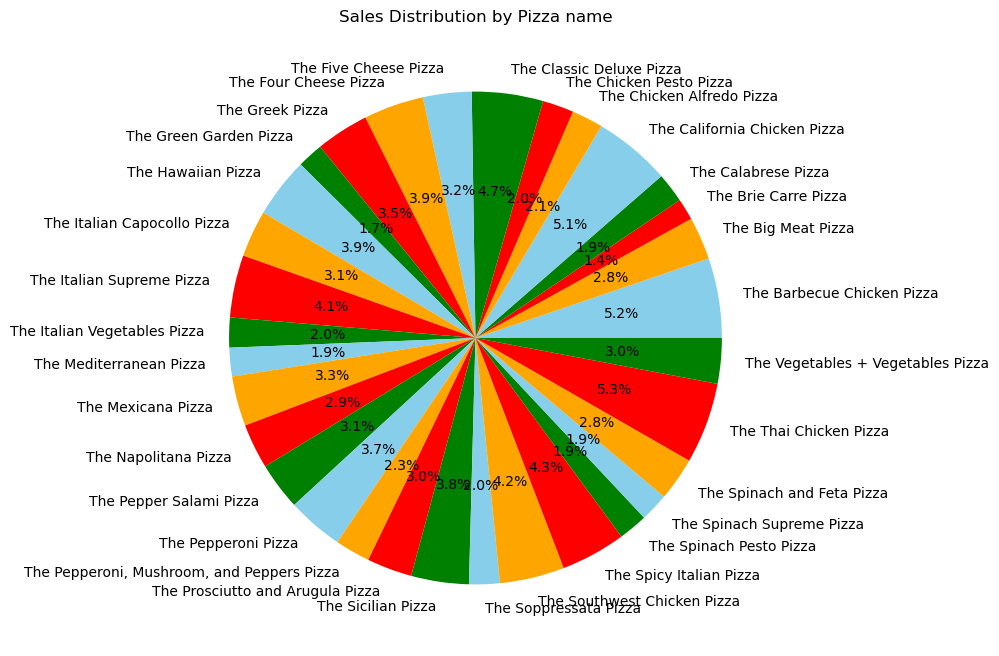

In [44]:
plt.figure(figsize=(8, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange','red', 'green'])
plt.title('Sales Distribution by Pizza name')
plt.ylabel('')  
plt.show()

In [45]:
sales_by_size = data.groupby('pizza_size')['total_price'].sum()

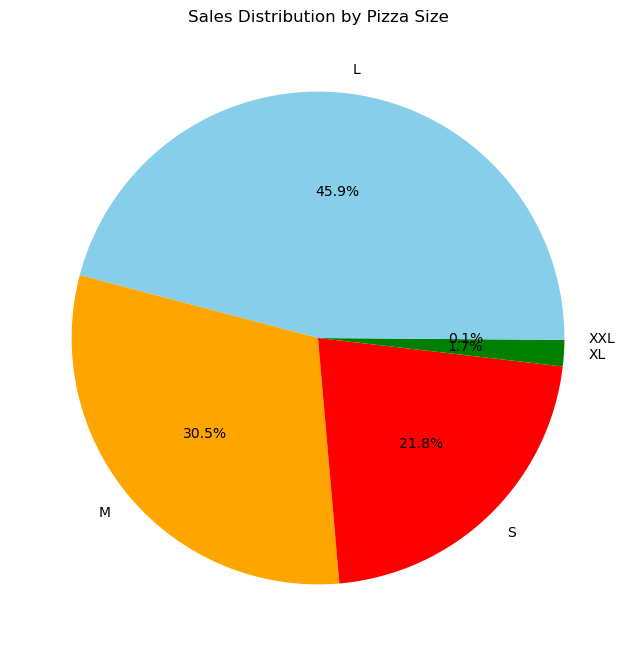

In [46]:
plt.figure(figsize=(8, 8))
sales_by_size.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange','red', 'green'])
plt.title('Sales Distribution by Pizza Size')
plt.ylabel('')  
plt.show()

In [47]:
print(sales_by_size)

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64


In [48]:
data['ingredients_list'] = data['pizza_ingredients'].apply(lambda x: x.split(', '))

In [49]:
all_ingredients = [ingredient for sublist in data['ingredients_list'] for ingredient in sublist]

In [50]:
ingredient_counts = Counter(all_ingredients)

In [51]:
most_common_ingredients = ingredient_counts.most_common()
print(most_common_ingredients)

[('Garlic', 27422), ('Tomatoes', 26601), ('Red Onions', 19547), ('Red Peppers', 16284), ('Mozzarella Cheese', 10333), ('Pepperoni', 10300), ('Spinach', 10012), ('Mushrooms', 9624), ('Chicken', 8443), ('Capocollo', 6572), ('Green Olives', 6174), ('Artichokes', 5682), ('Jalapeno Peppers', 5643), ('Green Peppers', 5224), ('Feta Cheese', 4748), ('Pineapple', 4685), ('Bacon', 4227), ('Asiago Cheese', 3342), ('Cilantro', 3341), ('Corn', 3341), ('Chipotle Sauce', 3341), ('Goat Cheese', 3301), ('Kalamata Olives', 3269), ('Fontina Cheese', 3259), ('Pesto Sauce', 2893), ('Zucchini', 2485), ('Barbecued Chicken', 2372), ('Barbecue Sauce', 2372), ('Sliced Ham', 2370), ('Thai Sweet Chilli Sauce', 2315), ('Artichoke', 2302), ('Gouda Cheese', 2302), ('Peperoncini verdi', 1887), ('Coarse Sicilian Salami', 1887), ('Luganega Sausage', 1887), ('Onions', 1887), ('Sun-dried Tomatoes', 1880), ('Ricotta Cheese', 1850), ('Gorgonzola Piccante Cheese', 1850), ('Parmigiano Reggiano Cheese', 1850), ('Calabrese Sal

In [52]:
ingredient_df = pd.DataFrame(most_common_ingredients, columns=['ingredient', 'count'])

In [53]:
fig = px.treemap(ingredient_df, 
                 path=['ingredient'], 
                 values='count', 
                 title='Treemap of Pizza Ingredients')
fig.show()

In [71]:
daily_sales = data.groupby('order_date')['total_price'].sum().reset_index()
daily_sales.columns = ['date', 'total_sales']

In [72]:
daily_sales['days'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days
X = daily_sales[['days']]
y = daily_sales['total_sales']

In [73]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [80]:
future_days = np.arange(daily_sales['days'].max() + 1, daily_sales['days'].max() + 31).reshape(-1, 1)
future_dates = daily_sales['date'].max() + pd.to_timedelta(np.arange(1, 31), unit='D')

In [82]:
predictions = model.predict(future_days)

c:\Users\Shahed\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



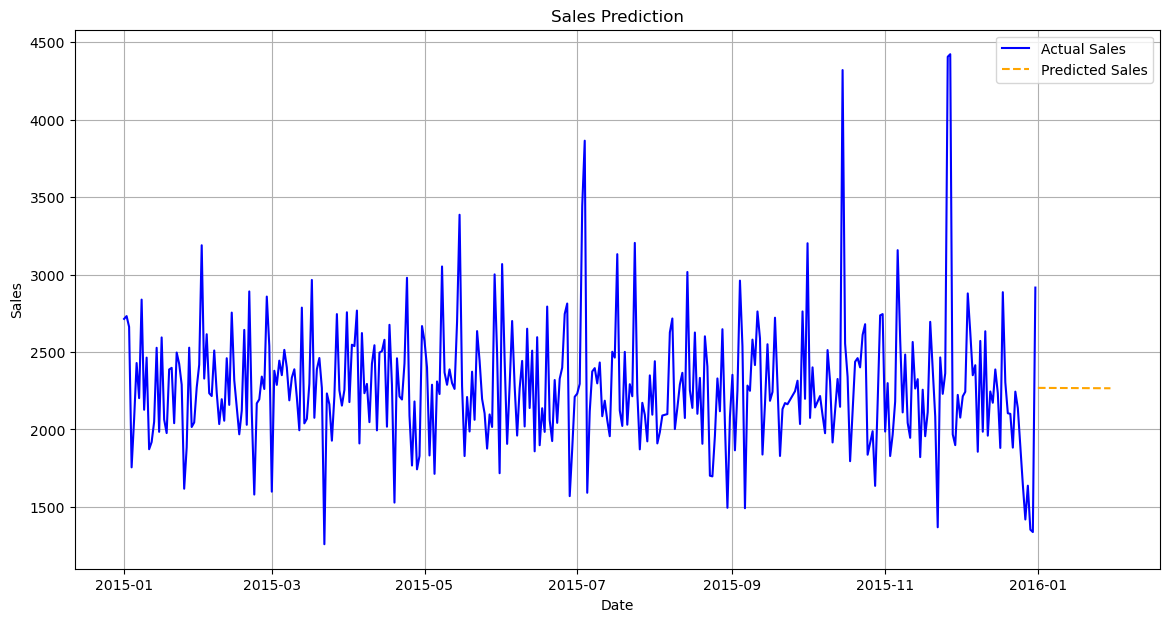

In [83]:
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['date'], daily_sales['total_sales'], label='Actual Sales', color='blue')
plt.plot(future_dates, predictions, label='Predicted Sales', color='orange', linestyle='--')
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [84]:
predicted_sales = pd.DataFrame({'date': future_dates, 'predicted_sales': predictions})
print(predicted_sales['predicted_sales'].sum())

68018.43082544745


In [85]:
new_days = np.array([365, 366, 367]).reshape(-1, 1)  
new_predictions = model.predict(new_days)

c:\Users\Shahed\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [86]:
for day, prediction in zip(new_days.flatten(), new_predictions):
    print(f"day {day}: predicted sales {prediction:.2f}")

day 365: predicted sales 2268.53
day 366: predicted sales 2268.45
day 367: predicted sales 2268.36
